In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip \*.zip && rm *.zip

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 1.77MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import NearestNeighbors

# Step 1: Load Data
data = pd.read_csv('/content/data.csv')

# Assuming 'diagnosis' is the target variable
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]
y = data['diagnosis']  # Target variable

# Step 2: Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Determine Optimal Number of Neighbors using Local Density Estimation
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train_scaled)
distances, _ = knn.kneighbors(X_train_scaled, n_neighbors=5)
local_density = np.mean(distances, axis=1)
optimal_k_values = np.ceil(local_density).astype(int)

# Step 5: Model Training - Adaptive KNN
y_pred = []
for i, x_test_point in enumerate(X_test_scaled):
    knn_model = KNeighborsClassifier(n_neighbors=optimal_k_values[i])
    knn_model.fit(X_train_scaled, y_train)
    y_pred.append(knn_model.predict([x_test_point])[0])

# Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9473684210526315
Precision: 0.9473684210526315
Recall: 0.9473684210526315
F1 Score: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



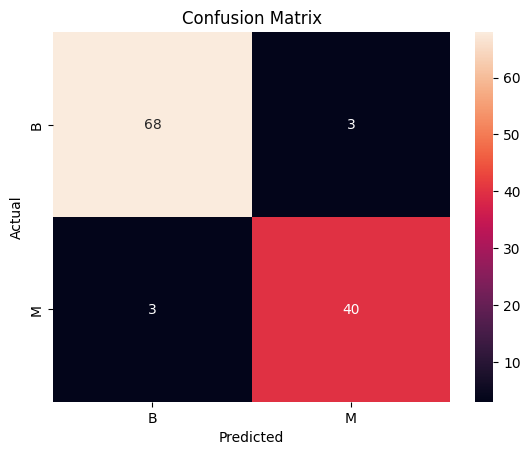

In [3]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()